In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_path = 'subject-0.tsv'
df = pd.read_csv(data_path, sep='\t')
display(df.columns)
df.head(5)

Index(['CNT', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD',
       'FPOGID', 'FPOGV', 'LPOGX', 'LPOGY', 'LPOGV', 'RPOGX', 'RPOGY', 'RPOGV',
       'BPOGX', 'BPOGY', 'BPOGV', 'LPCX', 'LPCY', 'LPD', 'LPS', 'LPV', 'RPCX',
       'RPCY', 'RPD', 'RPS', 'RPV', 'LEYEX', 'LEYEY', 'LEYEZ', 'LPUPILD',
       'LPUPILV', 'REYEX', 'REYEY', 'REYEZ', 'RPUPILD', 'RPUPILV', 'CX', 'CY',
       'CS', 'USER'],
      dtype='object')

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS,USER
0,286321,1936.80090,42337556872,0.40680,0.29487,1936.60022,0.20068,4793,1,0.41846,...,1,0.03066,0.01099,0.59348,0.00579,1,0.52604,0.48611,0,0
1,286322,1936.80762,42337623219,0.40736,0.29400,1936.60022,0.20740,4793,1,0.42988,...,1,0.03066,0.01099,0.59348,0.00577,1,0.52604,0.48611,0,NaN
2,286323,1936.81421,42337689339,0.40787,0.29295,1936.60022,0.21399,4793,1,0.42899,...,1,0.03150,0.01123,0.60885,0.00578,1,0.52604,0.48611,0,NaN
3,286324,1936.82092,42337757175,0.40825,0.29236,1936.60022,0.22070,4793,1,0.42368,...,1,0.03150,0.01123,0.60885,0.00577,1,0.52604,0.48611,0,NaN
4,286325,1936.82776,42337825261,0.40868,0.29188,1936.60022,0.22754,4793,1,0.42660,...,1,0.03150,0.01123,0.60885,0.00576,1,0.52604,0.48611,0,NaN


In [3]:
# drop invalid rows 
df = df[df['FPOGV'] == 1]  # Only valid gaze points

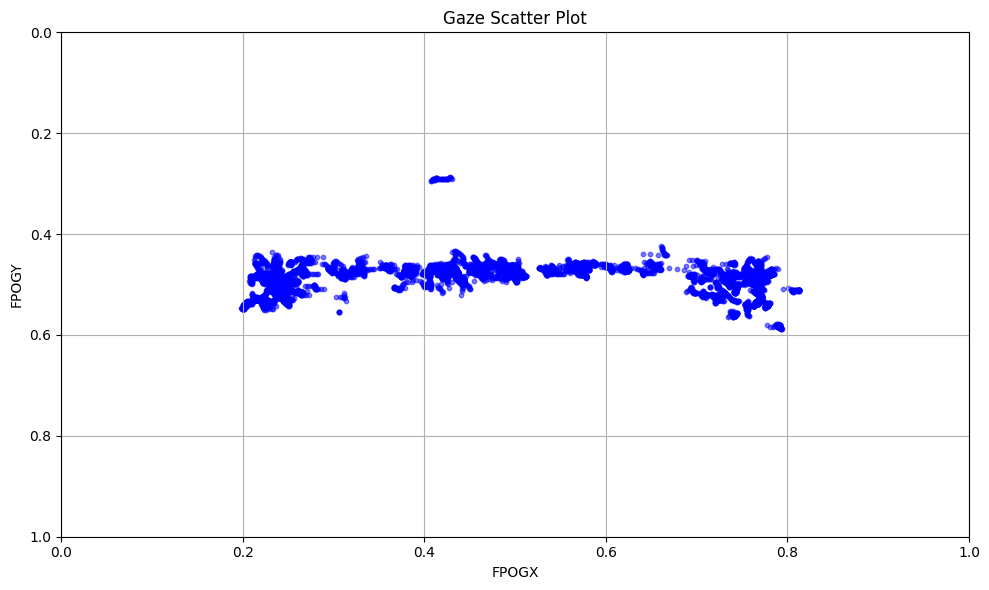

In [8]:
# Scatter plot of gaze positions
plt.figure(figsize=(10, 6))
plt.scatter(df['FPOGX'], df['FPOGY'], alpha=0.5, s=10, c='blue') # Parameter description: The X- and Y-coordinates of the fixation POG, as a fraction of the screen size. (0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right.
plt.title('Gaze Scatter Plot')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis() #(0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right. -> need to invert y-axis
plt.grid(True)
plt.tight_layout()
plt.savefig('gaze_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

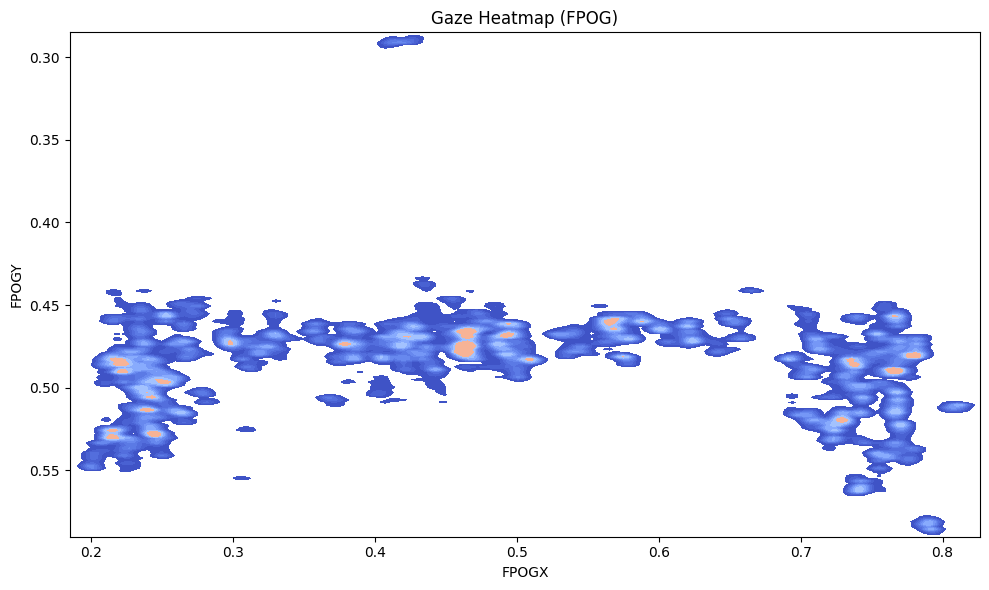

In [9]:
# === 3. Optional: Heatmap of gaze density (2D histogram) ===
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['FPOGX'], y=df['FPOGY'], fill=True, cmap='coolwarm', bw_adjust=0.1)
plt.title('Gaze Heatmap (FPOG)')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('heatmap_plot.png', dpi=300, bbox_inches='tight')
plt.show()

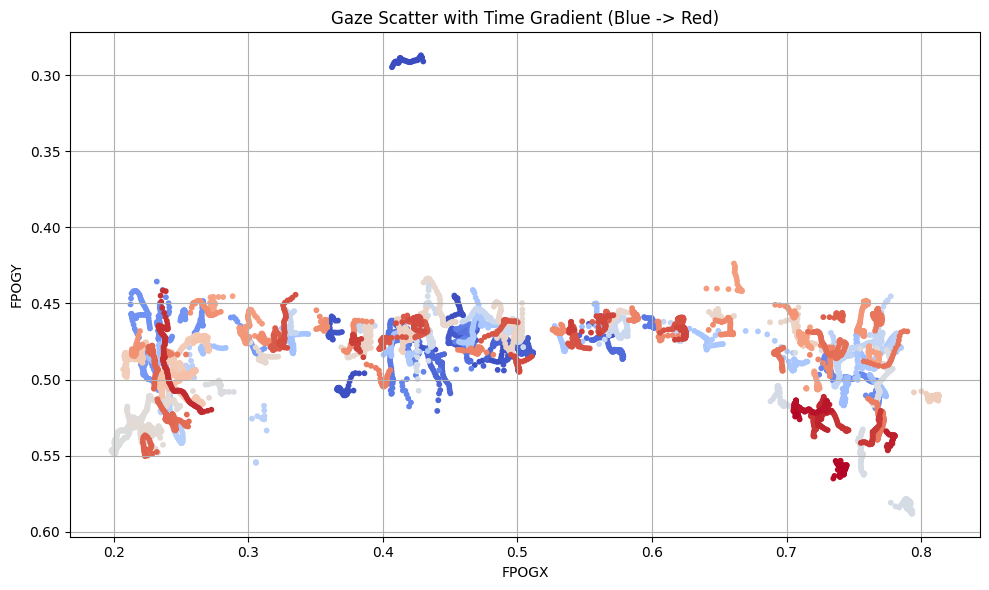

In [10]:
# Normalize time to 0–1 for color mapping
time_norm = (df['TIME'] - df['TIME'].min()) / (df['TIME'].max() - df['TIME'].min())

# Set up colormap from red to blue
colors = plt.cm.coolwarm(time_norm) 

# Plot with time-based color
plt.figure(figsize=(10, 6))
plt.scatter(df['FPOGX'], df['FPOGY'], color=colors, s=10)
plt.title('Gaze Scatter with Time Gradient (Blue -> Red)')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.savefig('gaze_scatter_time_plot.png', dpi=300, bbox_inches='tight')
plt.show()